<a href="https://colab.research.google.com/github/paulo-batista/LABDATA-FIA/blob/main/notas_aula16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula ministrada no dia 25/11/2021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

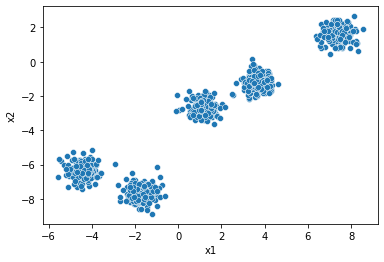

In [ ]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=800, centers=5, random_state=25, cluster_std=0.4)
X = pd.DataFrame(X, columns=['x1', 'x2'])

sns.scatterplot(data=X, x='x1', y='x2');

In [ ]:
!pip install yellowbrick

## KMeans

In [ ]:
import xgboost
xgboost.__version__

'0.90'

In [ ]:
from sklearn.cluster import KMeans

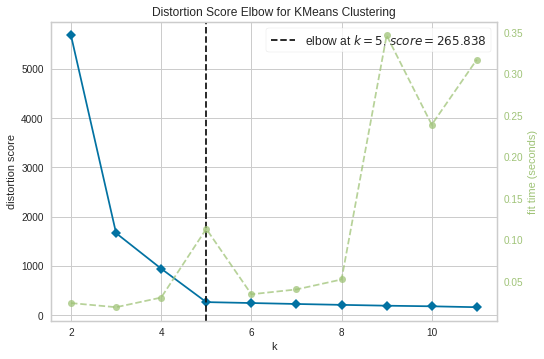

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(X)
visualizer.show()

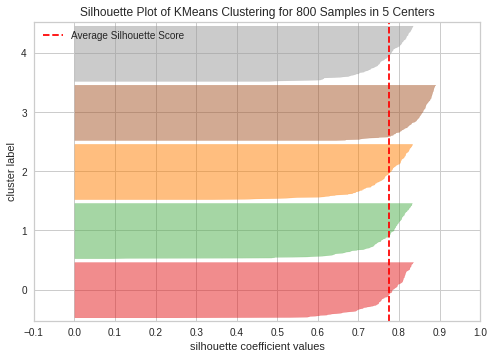

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=42, )

visualizer = SilhouetteVisualizer(model, )
visualizer.fit(X)
visualizer.show();

In [ ]:
axes.reshape(4).shape

(4,)

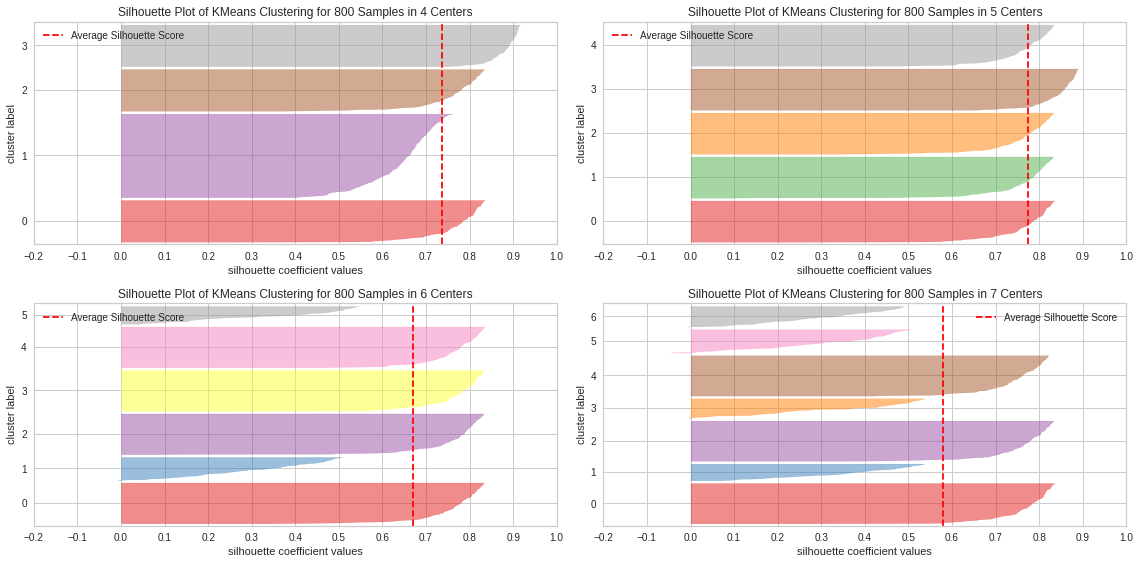

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
axes = axes.reshape(4)

for i, k in enumerate(range(4, 8)):
    model = KMeans(n_clusters=k, random_state=42)

    ax = axes[i]

    visualizer = SilhouetteVisualizer(model, ax=ax)
    visualizer.fit(X)
    visualizer.finalize()
    ax.set_xlim(-0.2, 1)

plt.tight_layout()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=30)
kmeans.fit(X)
labels = kmeans.predict(X)
labels[:10]

array([2, 1, 0, 0, 2, 2, 3, 2, 2, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-4.38821962, -6.30524194],
       [ 7.419995  ,  1.60522493],
       [ 2.41227194, -1.93761646],
       [-1.7039791 , -7.64971962]])

In [ ]:
X[:2]

,x1,x2
0,0.789390,-3.110766
1,7.377301,1.618709


In [ ]:
kmeans.predict([[0.789, -3.110]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [ ]:
kmeans.labels_[:10]

array([2, 1, 0, 0, 2, 2, 3, 2, 2, 2], dtype=int32)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

2    320
3    160
1    160
0    160
dtype: int64

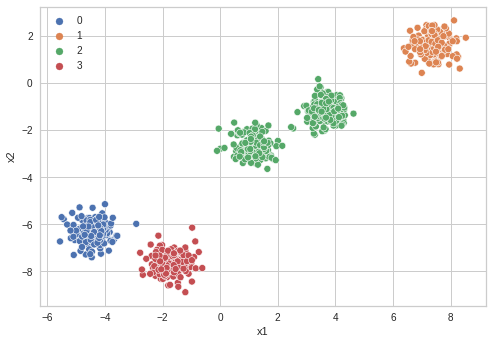

In [ ]:
sns.scatterplot(data=X, x='x1', y='x2', hue=labels, palette='deep');

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)


KMeans(n_clusters=4, random_state=42)

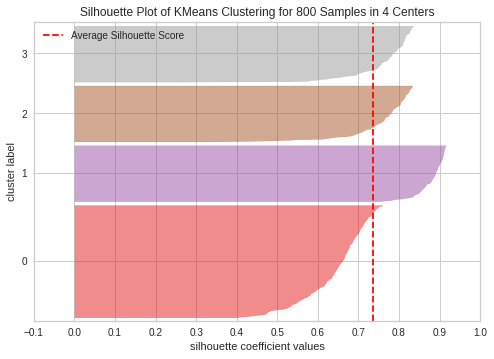

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, is_fitted=True)
visualizer.fit(X)
visualizer.show();

In [ ]:
pd.Series(visualizer.labels_).value_counts()

1    320
3    160
2    160
0    160
dtype: int64

**Verificar o problema de labels diferentes entre kmeans e yellowbricks**

In [ ]:
KElbowVisualizer()

## Cluster Hierarquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AgglomerativeClustering()

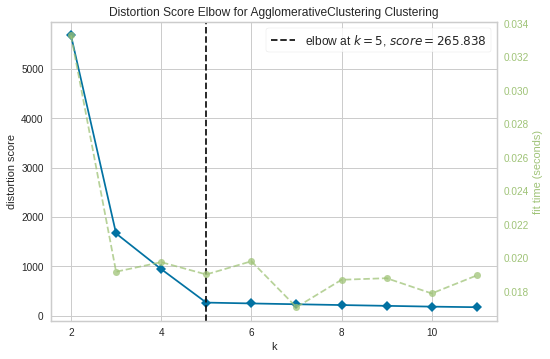

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

X, y_true = make_blobs(n_samples=800, centers=5, random_state=25, cluster_std=0.4)
X = pd.DataFrame(X, columns=['x1', 'x2'])

model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2, 12), )
visualizer.fit(X)
visualizer.show();

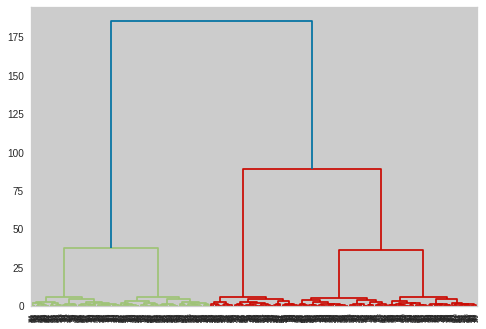

In [ ]:
from scipy.cluster import hierarchy

cluster_aglo = hierarchy.linkage(X, method='ward')
dend = hierarchy.dendrogram(cluster_aglo)

# Aula ministrada no dia 30/11/2021



## KMeans + SilhouetteVisualizer

In [ ]:
 !pip install yellowbrick -U

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=800, centers=5, random_state=25, cluster_std=0.4)
X = pd.DataFrame(X, columns=['x1', 'x2'])

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
np.unique(model.labels_)

array([0, 1, 2, 3], dtype=int32)

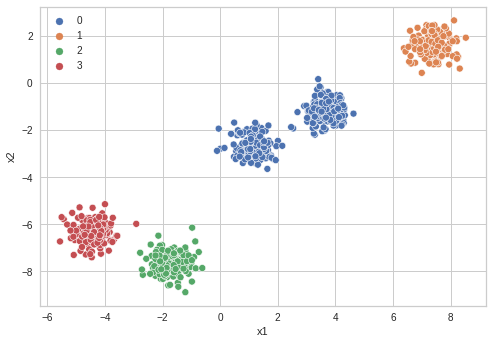

In [ ]:
sns.scatterplot(data=X, x='x1', y='x2', hue=model.labels_, palette='deep');

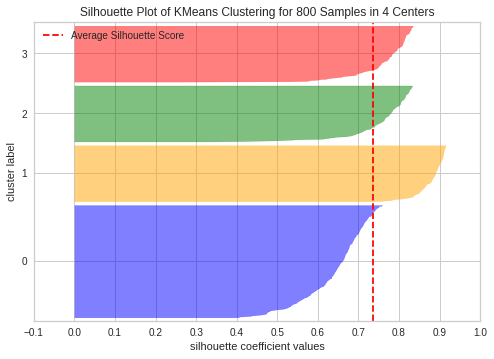

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

visualizer = silhouette_visualizer(estimator=model, X=X, colors=['blue', 'orange', 'green', 'red'])

## DBSCAN

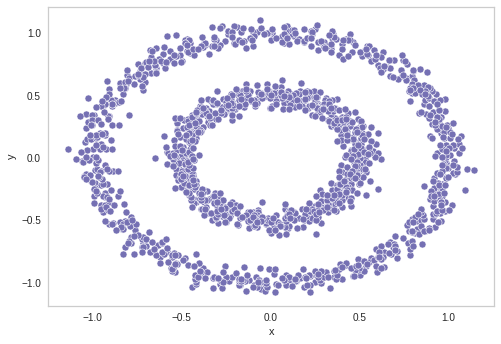

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500, factor=.5,
                                      noise=.05)

X = pd.DataFrame(X, columns=['x', 'y'])
sns.set_style({'axes.grid' : False})
sns.scatterplot(data=X, x='x', y='y', s=50, palette='deep');

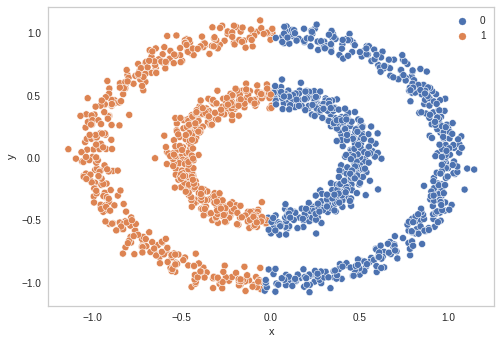

In [ ]:
labels = KMeans(n_clusters=2).fit_predict(X)
sns.scatterplot(data=X, x='x', y='y', hue=labels, s=50, palette='deep');

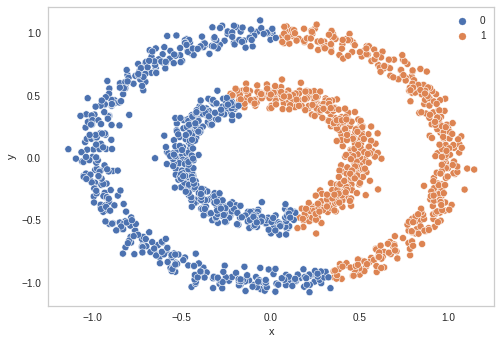

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=2).fit(X)
sns.scatterplot(data=X, x='x', y='y', hue=hclust.labels_, s=50, palette='deep');

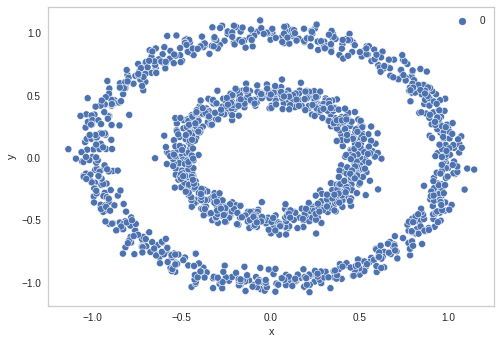

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

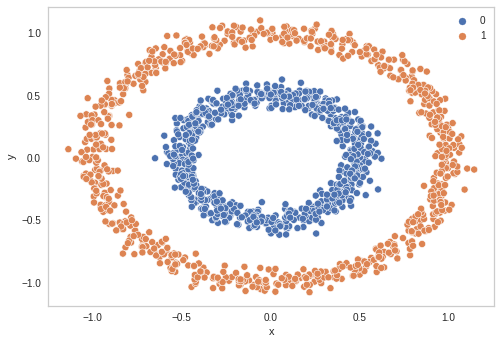

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

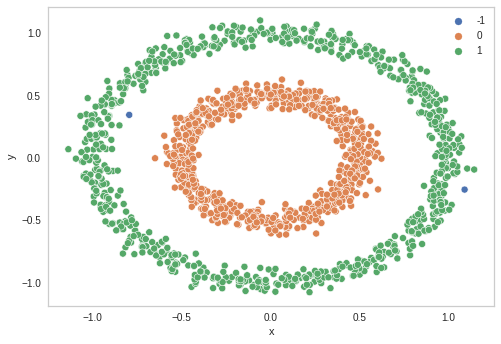

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)

sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

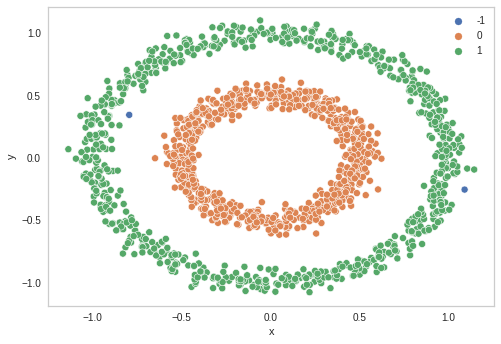

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)

sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

In [ ]:
from sklearn.neighbors import NearestNeighbors

vizinhos = NearestNeighbors(n_neighbors=2, ).fit(X)

In [ ]:
distancias, idxs = vizinhos.kneighbors(X)

In [ ]:
distancias[:4]

array([[0.        , 0.01459389],
       [0.        , 0.02482774],
       [0.        , 0.01542076],
       [0.        , 0.00344068]])

In [ ]:
idxs[:4]

array([[   0,  441],
       [   1,   42],
       [   2,  618],
       [   3, 1231]])

In [ ]:
idxs[441]

array([441, 628])

In [ ]:
dsts = np.sort(distancias, axis=0)
dsts[:4]

array([[0.        , 0.00089319],
       [0.        , 0.00089319],
       [0.        , 0.00135848],
       [0.        , 0.00135848]])

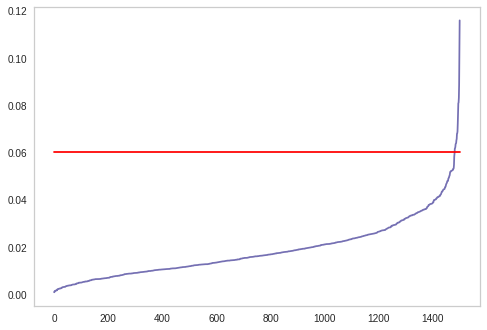

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dsts[:, 1])
plt.plot([0, 1500], [0.06, 0.06], color='red')

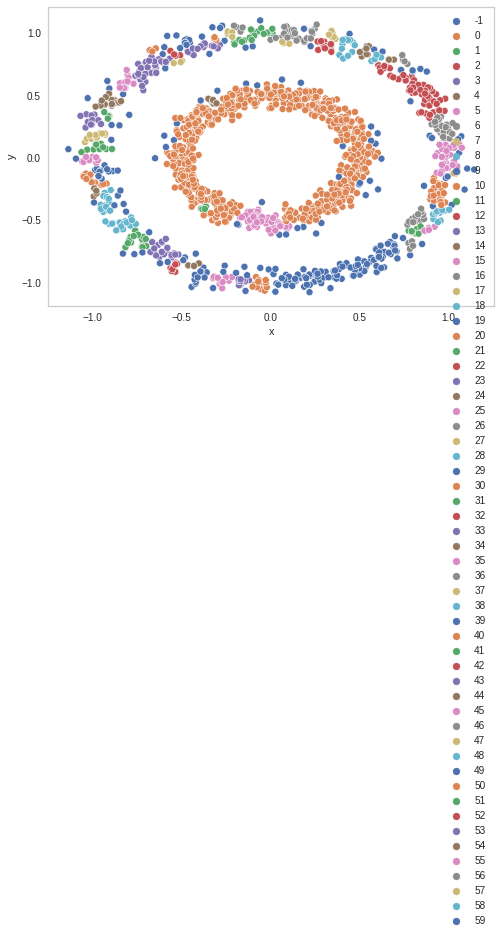

In [ ]:
dbscan = DBSCAN(eps=0.04, min_samples=3)
dbscan.fit(X)

sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

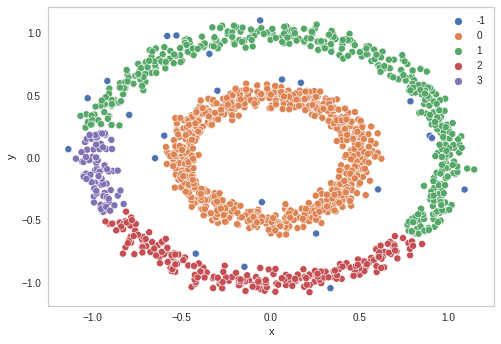

In [ ]:
dbscan = DBSCAN(eps=0.06, min_samples=3)
dbscan.fit(X)

sns.scatterplot(data=X, x='x', y='y', hue=dbscan.labels_, s=50, palette='deep');

# Case OLIST

In [ ]:
import os
import numpy as np
import pandas as pd

workdir = '/content/drive/MyDrive/datasets'
datadir = os.path.join(workdir, 'olist')

df_orders = pd.read_csv(os.path.join(datadir, 'olist_orders_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(datadir, 'olist_order_items_dataset.csv'))
df_products = pd.read_csv(os.path.join(datadir, 'olist_products_dataset.csv'))

In [ ]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df_orders.shape

(99441, 8)

In [ ]:
df_order_items.shape

(112650, 7)

In [ ]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_order_items.shape

(112650, 7)

In [ ]:
df_joined = df_order_items.merge(df_products, how='inner', on='product_id')
df_joined

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [ ]:
# seller_id -> cool_stuff | ferramentas_jardim | moveis_decoracao | relogios_presentes | esporte_lazer | cama_mesa_banho

# 48436dade18ac8b2bce089ec2a041202 -> 5 | 0 | 0 | 0 | 0 | 0
# d1c7fa84e48cfa21a0e595167c1c500e -> 0 | 1 | 0 | 0 | 0 | 0

In [ ]:
abt = pd.crosstab(df_joined.seller_id, df_joined.product_category_name, normalize='index').reset_index()

In [ ]:
abt

product_category_name,seller_id,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,beleza_saude,brinquedos,cama_mesa_banho,casa_conforto,casa_conforto_2,casa_construcao,cds_dvds_musicais,cine_foto,climatizacao,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_iluminacao,construcao_ferramentas_jardim,construcao_ferramentas_seguranca,cool_stuff,dvds_blu_ray,eletrodomesticos,eletrodomesticos_2,eletronicos,eletroportateis,esporte_lazer,fashion_bolsas_e_acessorios,fashion_calcados,fashion_esporte,fashion_roupa_feminina,fashion_roupa_infanto_juvenil,fashion_roupa_masculina,fashion_underwear_e_moda_praia,ferramentas_jardim,flores,fraldas_higiene,industria_comercio_e_negocios,informatica_acessorios,instrumentos_musicais,la_cuisine,livros_importados,livros_interesse_geral,livros_tecnicos,malas_acessorios,market_place,moveis_colchao_e_estofado,moveis_cozinha_area_de_servico_jantar_e_jardim,moveis_decoracao,moveis_escritorio,moveis_quarto,moveis_sala,musica,papelaria,pc_gamer,pcs,perfumaria,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,001e6ad469a905060d959994f1b41e4f,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,002100f778ceb8431b7a1020ff7ab48f,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,ffcfefa19b08742c5d315f2791395ee5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3031,ffdd9f82b9a447f6f8d4b91554cc7dd3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.

In [ ]:
X = abt.drop(columns='seller_id').copy()
X

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,beleza_saude,brinquedos,cama_mesa_banho,casa_conforto,casa_conforto_2,casa_construcao,cds_dvds_musicais,cine_foto,climatizacao,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_iluminacao,construcao_ferramentas_jardim,construcao_ferramentas_seguranca,cool_stuff,dvds_blu_ray,eletrodomesticos,eletrodomesticos_2,eletronicos,eletroportateis,esporte_lazer,fashion_bolsas_e_acessorios,fashion_calcados,fashion_esporte,fashion_roupa_feminina,fashion_roupa_infanto_juvenil,fashion_roupa_masculina,fashion_underwear_e_moda_praia,ferramentas_jardim,flores,fraldas_higiene,industria_comercio_e_negocios,informatica_acessorios,instrumentos_musicais,la_cuisine,livros_importados,livros_interesse_geral,livros_tecnicos,malas_acessorios,market_place,moveis_colchao_e_estofado,moveis_cozinha_area_de_servico_jantar_e_jardim,moveis_decoracao,moveis_escritorio,moveis_quarto,moveis_sala,musica,papelaria,pc_gamer,pcs,perfumaria,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3031,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.150000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

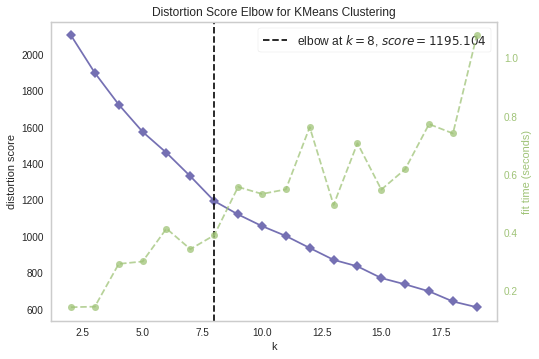

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 20))

visualizer.fit(X);
visualizer.show();

In [ ]:
model = KMeans(random_state=42)
model.fit(X)

KMeans(random_state=42)

In [ ]:
model.labels_

array([4, 4, 3, ..., 4, 1, 5], dtype=int32)

In [ ]:
abt['cluster_id'] = model.labels_

In [ ]:
abt.head()

product_category_name,seller_id,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,beleza_saude,brinquedos,cama_mesa_banho,casa_conforto,casa_conforto_2,casa_construcao,cds_dvds_musicais,cine_foto,climatizacao,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_iluminacao,construcao_ferramentas_jardim,construcao_ferramentas_seguranca,cool_stuff,dvds_blu_ray,eletrodomesticos,eletrodomesticos_2,eletronicos,eletroportateis,esporte_lazer,fashion_bolsas_e_acessorios,fashion_calcados,fashion_esporte,fashion_roupa_feminina,fashion_roupa_infanto_juvenil,fashion_roupa_masculina,fashion_underwear_e_moda_praia,ferramentas_jardim,flores,fraldas_higiene,industria_comercio_e_negocios,informatica_acessorios,instrumentos_musicais,la_cuisine,livros_importados,livros_interesse_geral,livros_tecnicos,malas_acessorios,market_place,moveis_colchao_e_estofado,moveis_cozinha_area_de_servico_jantar_e_jardim,moveis_decoracao,moveis_escritorio,moveis_quarto,moveis_sala,musica,papelaria,pc_gamer,pcs,perfumaria,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas,cluster_id
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,001e6ad469a905060d959994f1b41e4f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


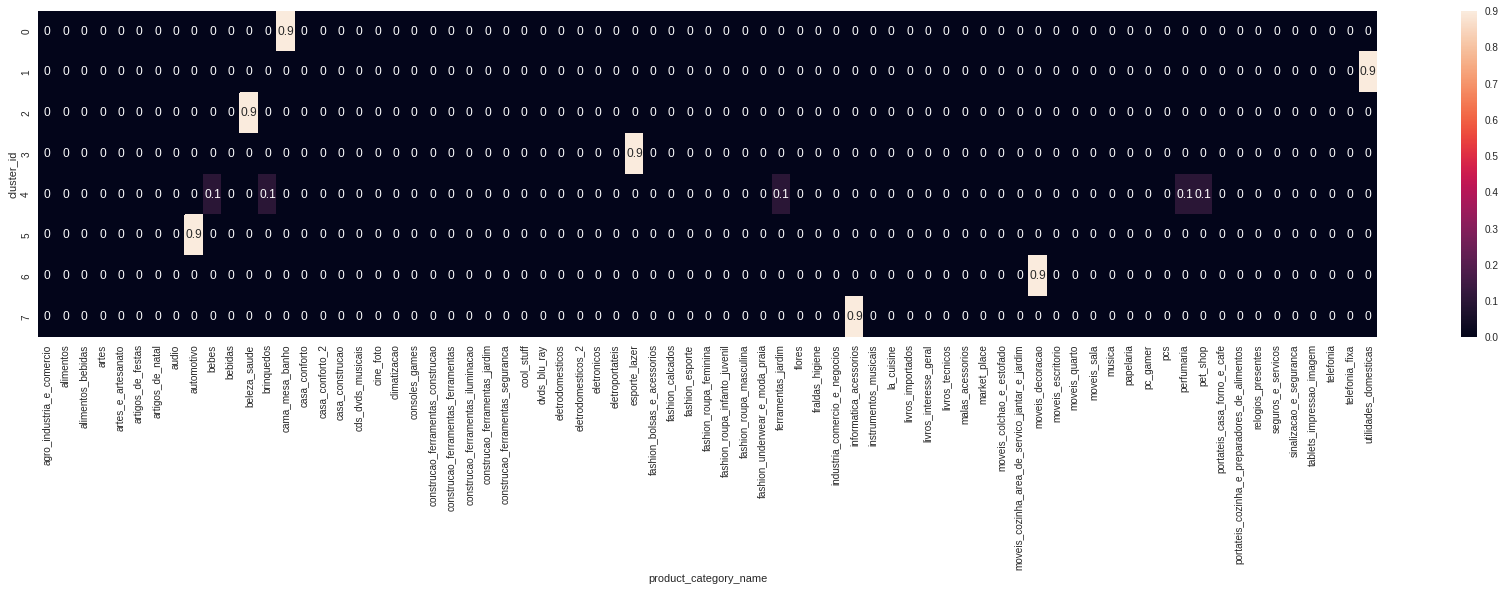

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 6))
sns.heatmap(abt.groupby(abt.cluster_id).mean().round(1), annot=True)

In [ ]:
X.head(2)

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,beleza_saude,brinquedos,cama_mesa_banho,casa_conforto,casa_conforto_2,casa_construcao,cds_dvds_musicais,cine_foto,climatizacao,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_iluminacao,construcao_ferramentas_jardim,construcao_ferramentas_seguranca,cool_stuff,dvds_blu_ray,eletrodomesticos,eletrodomesticos_2,eletronicos,eletroportateis,esporte_lazer,fashion_bolsas_e_acessorios,fashion_calcados,fashion_esporte,fashion_roupa_feminina,fashion_roupa_infanto_juvenil,fashion_roupa_masculina,fashion_underwear_e_moda_praia,ferramentas_jardim,flores,fraldas_higiene,industria_comercio_e_negocios,informatica_acessorios,instrumentos_musicais,la_cuisine,livros_importados,livros_interesse_geral,livros_tecnicos,malas_acessorios,market_place,moveis_colchao_e_estofado,moveis_cozinha_area_de_servico_jantar_e_jardim,moveis_decoracao,moveis_escritorio,moveis_quarto,moveis_sala,musica,papelaria,pc_gamer,pcs,perfumaria,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
abt.head(2)

product_category_name,seller_id,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,beleza_saude,brinquedos,cama_mesa_banho,casa_conforto,casa_conforto_2,casa_construcao,cds_dvds_musicais,cine_foto,climatizacao,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_iluminacao,construcao_ferramentas_jardim,construcao_ferramentas_seguranca,cool_stuff,dvds_blu_ray,eletrodomesticos,eletrodomesticos_2,eletronicos,eletroportateis,esporte_lazer,fashion_bolsas_e_acessorios,fashion_calcados,fashion_esporte,fashion_roupa_feminina,fashion_roupa_infanto_juvenil,fashion_roupa_masculina,fashion_underwear_e_moda_praia,ferramentas_jardim,flores,fraldas_higiene,industria_comercio_e_negocios,informatica_acessorios,instrumentos_musicais,la_cuisine,livros_importados,livros_interesse_geral,livros_tecnicos,malas_acessorios,market_place,moveis_colchao_e_estofado,moveis_cozinha_area_de_servico_jantar_e_jardim,moveis_decoracao,moveis_escritorio,moveis_quarto,moveis_sala,musica,papelaria,pc_gamer,pcs,perfumaria,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas,cluster_id
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.887029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, abt['cluster_id'])

DecisionTreeClassifier(random_state=42)

In [ ]:
top_features = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False).head(9)
top_features

product_category_name
beleza_saude                     0.167880
esporte_lazer                    0.165071
utilidades_domesticas            0.150157
automotivo                       0.150130
moveis_decoracao                 0.143584
informatica_acessorios           0.117346
cama_mesa_banho                  0.105212
industria_comercio_e_negocios    0.000620
cool_stuff                       0.000000
dtype: float64

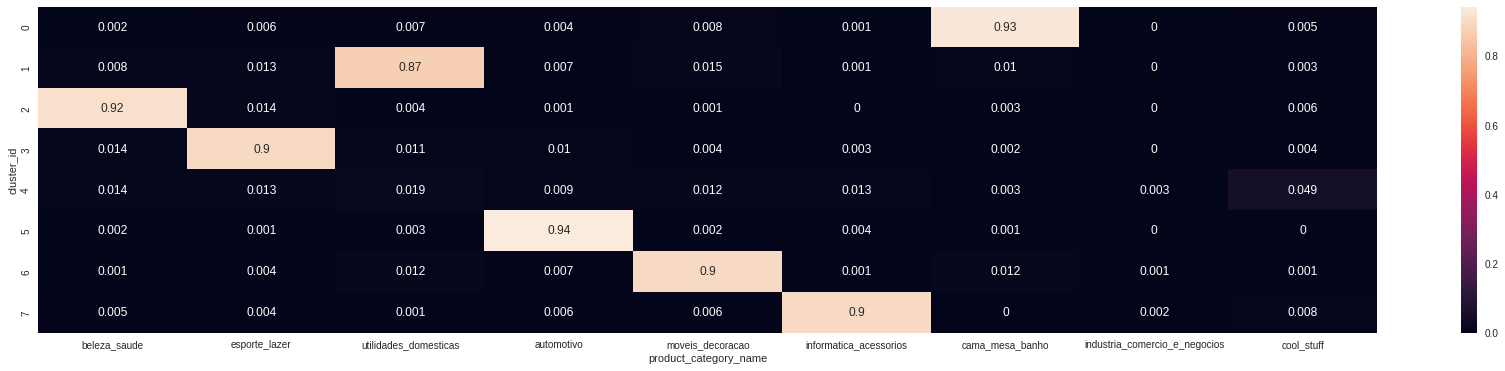

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.heatmap(abt.groupby(abt.cluster_id)[top_features.index].mean().round(3), annot=True)

## Vendas vs Receita

In [ ]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
df_abt_vr = (
    df_order_items
    .merge(df_orders, on='order_id', how='inner')
    .filter(['order_id', 'seller_id', 'price'])
    .groupby('seller_id')
    .agg(
        receita = ('price', 'sum'),
        vendas = ('order_id', 'nunique')
    ).reset_index()
) 
df_abt_vr

,seller_id,receita,vendas
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,200
2,001e6ad469a905060d959994f1b41e4f,250.00,1
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,51
4,003554e2dce176b5555353e4f3555ac8,120.00,1
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,69.90,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20,18
3092,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,14
3093,fffd5413c0700ac820c7069d66d98c89,9062.30,60


In [ ]:
df_abt_vr.vendas.sort_values()

1547       1
1959       1
1953       1
1949       1
1942       1
        ... 
2643    1314
368     1404
2481    1706
881     1806
1235    1854
Name: vendas, Length: 3095, dtype: int64

In [ ]:
df_abt_vr['rank_pct_receita'] = df_abt_vr.receita.rank(pct=True)
df_abt_vr['rank_pct_vendas'] = df_abt_vr.vendas.rank(pct=True)

In [ ]:
df_abt_vr.head()

,seller_id,receita,vendas,rank_pct_receita,rank_pct_vendas
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3,0.716640,0.334249
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,200,0.967690,0.971082
2,001e6ad469a905060d959994f1b41e4f,250.00,1,0.276252,0.092407
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,51,0.580937,0.865267
4,003554e2dce176b5555353e4f3555ac8,120.00,1,0.156220,0.092407


In [ ]:
X_abt_rv = df_abt_vr[['rank_pct_receita', 'rank_pct_vendas']]
X_abt_rv.head()

,rank_pct_receita,rank_pct_vendas
0,0.716640,0.334249
1,0.967690,0.971082
2,0.276252,0.092407
3,0.580937,0.865267
4,0.156220,0.092407


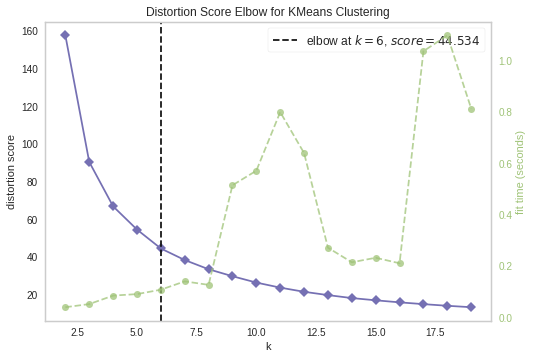

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 20))

visualizer.fit(X_abt_rv);
visualizer.show();

In [ ]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(X_abt_rv)
df_abt_vr['cluster_id'] = model.labels_

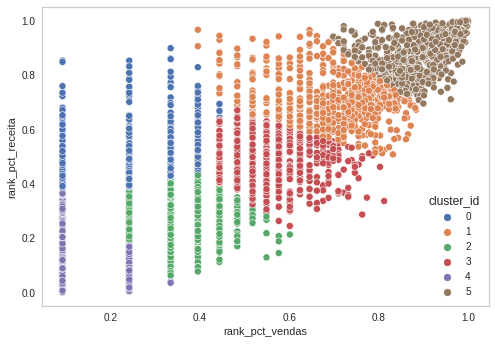

In [ ]:
sns.scatterplot(data=df_abt_vr, x='rank_pct_vendas', y='rank_pct_receita', hue='cluster_id', s=50, palette='deep')

In [ ]:
df_analise = df_abt_vr.groupby('cluster_id').agg(
    receita_media = ('receita', 'mean'), 
    vendas_media = ('vendas', 'mean'),
    
)
df_analise['ticket_medio'] = df_analise['receita_media'] / df_analise['vendas_media']
df_analise

,receita_media,vendas_media,ticket_medio
cluster_id,,,
0,1345.063357,2.466431,545.348037
1,3168.983546,18.528369,171.034136
2,257.869215,3.563380,72.366460
3,805.379699,9.417671,85.517930
4,105.264268,1.219626,86.308633
5,17719.908838,133.581015,132.652899


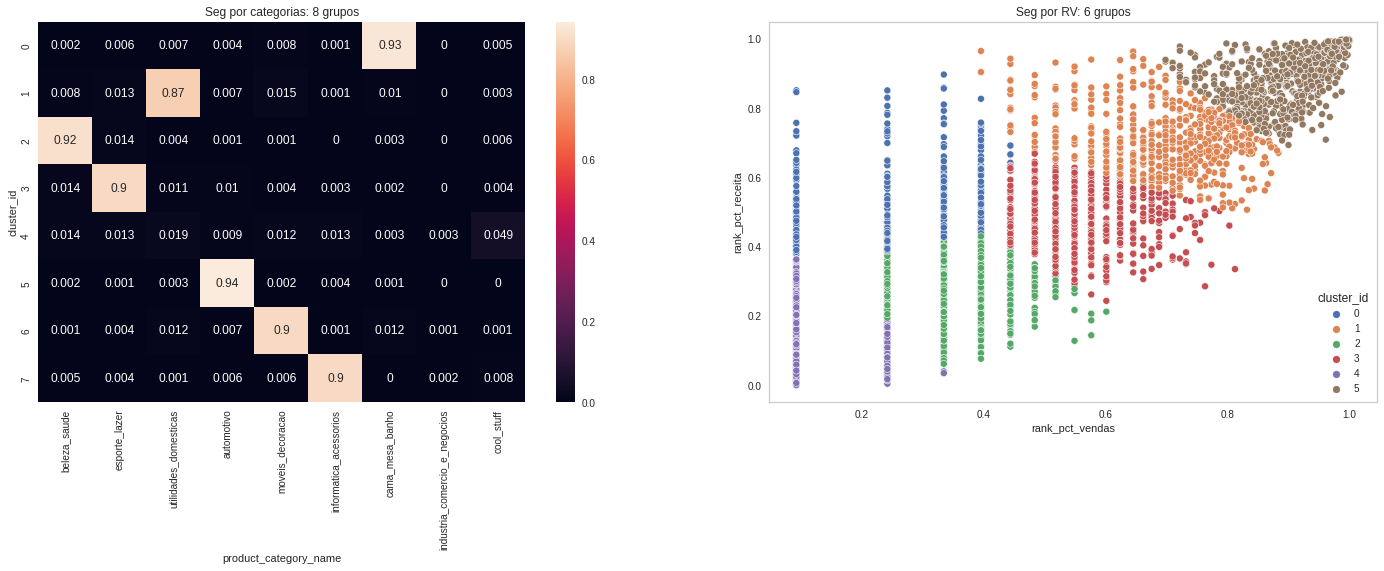

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24, 7))

ax[0].set_title('Seg por categorias: 8 grupos')
ax[1].set_title('Seg por RV: 6 grupos')
sns.heatmap(abt.groupby(abt.cluster_id)[top_features.index].mean().round(3), annot=True, ax=ax[0])
sns.scatterplot(data=df_abt_vr, x='rank_pct_vendas', y='rank_pct_receita', hue='cluster_id', s=50, palette='deep', ax=ax[1]);

In [ ]:
df_clusters = (
    abt
    .merge(df_abt_vr, on='seller_id', how='inner')
    .rename(columns={'cluster_id_x': 'cluster_categorias', 'cluster_id_y': 'cluster_rv'})
    .filter(['seller_id', 'cluster_categorias', 'cluster_rv'])
)
df_clusters

,seller_id,cluster_categorias,cluster_rv
0,0015a82c2db000af6aaaf3ae2ecb0532,4,0
1,001cca7ae9ae17fb1caed9dfb1094831,4,5
2,001e6ad469a905060d959994f1b41e4f,3,4
3,002100f778ceb8431b7a1020ff7ab48f,6,1
4,004c9cd9d87a3c30c522c48c4fc07416,0,5
...,...,...,...
3030,ffcfefa19b08742c5d315f2791395ee5,4,4
3031,ffdd9f82b9a447f6f8d4b91554cc7dd3,1,1
3032,ffeee66ac5d5a62fe688b9d26f83f534,4,1
3033,fffd5413c0700ac820c7069d66d98c89,1,5


In [ ]:
# abt
df_abt_vr

,seller_id,receita,vendas,rank_pct_receita,rank_pct_vendas,cluster_id,ticket_medio
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3,0.716640,0.334249,0,895.000000
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,200,0.967690,0.971082,5,125.400150
2,001e6ad469a905060d959994f1b41e4f,250.00,1,0.276252,0.092407,4,250.000000
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,51,0.580937,0.865267,1,24.205882
4,003554e2dce176b5555353e4f3555ac8,120.00,1,0.156220,0.092407,4,120.000000
...,...,...,...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,69.90,1,0.088368,0.092407,4,69.900000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20,18,0.680129,0.721325,1,116.733333
3092,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,14,0.660097,0.675121,1,131.418571
3093,fffd5413c0700ac820c7069d66d98c89,9062.30,60,0.892730,0.881099,5,151.038333


### Sobre .rank() do Pandas

In [ ]:
df_aux = pd.DataFrame({'nome': list('abcdefghij'), 'idade':[20, 20, 45, 30, 60, 30, 25, 15, 20, 65]})
df_aux

,nome,idade
0,a,20
1,b,20
2,c,45
3,d,30
4,e,60
5,f,30
6,g,25
7,h,15
8,i,20
9,j,65


In [ ]:
df_aux['rank'] = df_aux.idade.rank(pct=True)
df_aux

,nome,idade,rank
0,a,20,0.30
1,b,20,0.30
2,c,45,0.80
3,d,30,0.65
4,e,60,0.90
5,f,30,0.65
6,g,25,0.50
7,h,15,0.10
8,i,20,0.30
9,j,65,1.00
